In [1]:
library(tidyverse)
library(psych)

if(!require('readr')) {
    install.packages('readr')
    library('readr')
}

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [2]:
df2 <- read_delim(paste("breast-cancer-1992-v4.csv","", sep=""),
	delim = ";",
	col_names = TRUE,
	escape_double = FALSE,
	col_types = cols(
		code = col_integer(),
		ClumpThickness = col_integer(),
		UniformityCellSize = col_integer(),
		UniformityCellShape = col_integer(),
		MarginalAdhesion = col_integer(),
		SingleEpithelialCellSize = col_integer(),
		BareNuclei = col_integer(),
		BlandChromatin = col_integer(),
		NormalNucleoli = col_integer(),
		Mitoses = col_integer(),
		Class = col_integer()
	),
	trim_ws = TRUE)

In [3]:
df2$Class <- NULL
df2$code <- NULL

In [4]:
head(df2)

ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
5,1,1,1,2,1,3,1,1
5,4,4,5,7,10,3,2,1
3,1,1,1,2,2,3,1,1
6,8,8,1,3,4,3,7,1
4,1,1,3,2,1,3,1,1
8,10,10,8,7,10,9,7,1


In [5]:
km.out<-kmeans(df2, centers=2, nstart=30)


In [6]:
# Inspect the result
summary(km.out)

             Length Class  Mode   
cluster      699    -none- numeric
centers       18    -none- numeric
totss          1    -none- numeric
withinss       2    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           2    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

In [7]:
# Print the cluster membership component of the model
km.out$cluster

# Print the km.out object
km.out

[1] 2 1 2 1 2 1 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 1
 [38] 2 1 1 1 1 1 1 1 2 1 2 2 1 2 2 1 1 1 1 1 2 1 2 1 2 1 2 2 2 2 1 1 2 2 1 2 1
 [75] 1 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 1 2 1 1 2 1 2
[112] 1 1 1 2 2 2 1 2 2 2 2 1 1 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2
[149] 2 1 2 1 1 2 2 1 2 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1 1 2 1 2 1 2 2 2 1 1
[186] 2 1 1 1 2 1 1 2 2 2 2 1 2 2 2 1 1 2 2 2 1 1 2 2 2 1 1 2 1 1 1 2 2 1 2 2 1
[223] 2 1 1 2 1 1 2 1 1 1 2 1 2 2 1 1 1 1 2 2 2 2 2 2 1 1 2 2 2 1 1 1 1 1 2 2 2
[260] 1 1 1 1 1 1 2 1 1 1 2 1 2 1 2 2 2 2 2 2 1 2 2 1 1 1 1 1 2 1 1 2 2 1 1 2 1
[297] 1 2 2 1 1 2 1 2 1 1 2 2 1 2 2 2 1 2 2 1 1 1 2 1 1 2 2 1 2 2 1 2 1 1 1 2 2
[334] 1 1 2 1 2 2 1 1 2 2 2 1 2 2 2 2 1 2 2 1 1 2 2 2 1 1 1 1 1 2 2 2 2 1 1 2 2
[371] 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
[408] 2 2 2 2 2 1 2 1 2 1 2 2 2 2 1 2 2 2 1 2 1 2 2 2 2 2 2 1 1 1 2 2 2 1 2 2 2
[445] 2 2 2 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2
[482] 2 1 1 2 2 2 1 1 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 1 2 2
[519] 2 1 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2
[556] 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 1 2 1 1
[593] 1 2 1 2 2 2 2 2 2 2 2 1 1 1 2 2 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
[630] 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
[667] 2 2 1 1 1 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 1 1

K-means clustering with 2 clusters of sizes 235, 464

Cluster means:
  ClumpThickness UniformityCellSize UniformityCellShape MarginalAdhesion
1       7.153191           6.765957            6.706383         5.706383
2       3.032328           1.295259            1.435345         1.338362
  SingleEpithelialCellSize BareNuclei BlandChromatin NormalNucleoli  Mitoses
1                 5.442553   7.859574       6.093617       6.063830 2.536170
2                 2.088362   1.375000       2.092672       1.247845 1.109914

Clustering vector:
  [1] 2 1 2 1 2 1 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 1
 [38] 2 1 1 1 1 1 1 1 2 1 2 2 1 2 2 1 1 1 1 1 2 1 2 1 2 1 2 2 2 2 1 1 2 2 1 2 1
 [75] 1 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 1 2 1 1 2 1 2
[112] 1 1 1 2 2 2 1 2 2 2 2 1 1 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2
[149] 2 1 2 1 1 2 2 1 2 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1 1 2 1 2 1 2 2 2 1 1
[186] 2 1 1 1 2 1 1 2 2 2 2 1 2 2 2 1 1 2 2 2 1 1 2 2 2 1 1 2

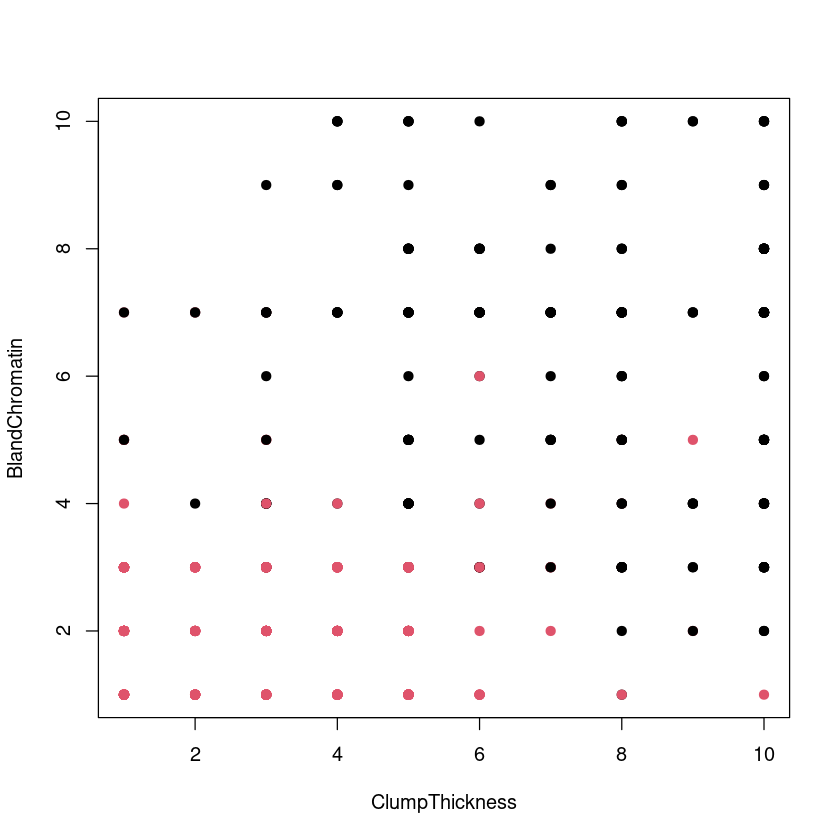

In [8]:
df2$cluster <- km.out$cluster

# Graficar los datos agrupados
plot(df2$ClumpThickness, df2$BlandChromatin, col = df2$cluster, 
     pch = 19, xlab = "ClumpThickness", ylab = "BlandChromatin")


-----------------------------------------------------------------------------

**Hierarchical clustering model**

In [9]:
# Create hierarchical clustering model: hclust.out
hclust.out <- hclust(dist(df2,method="euclidean"),method = "complete")

In [10]:
# Inspect the result
summary(hclust.out)

            Length Class  Mode     
merge       1396   -none- numeric  
height       698   -none- numeric  
order        699   -none- numeric  
labels         0   -none- NULL     
method         1   -none- character
call           3   -none- call     
dist.method    1   -none- character

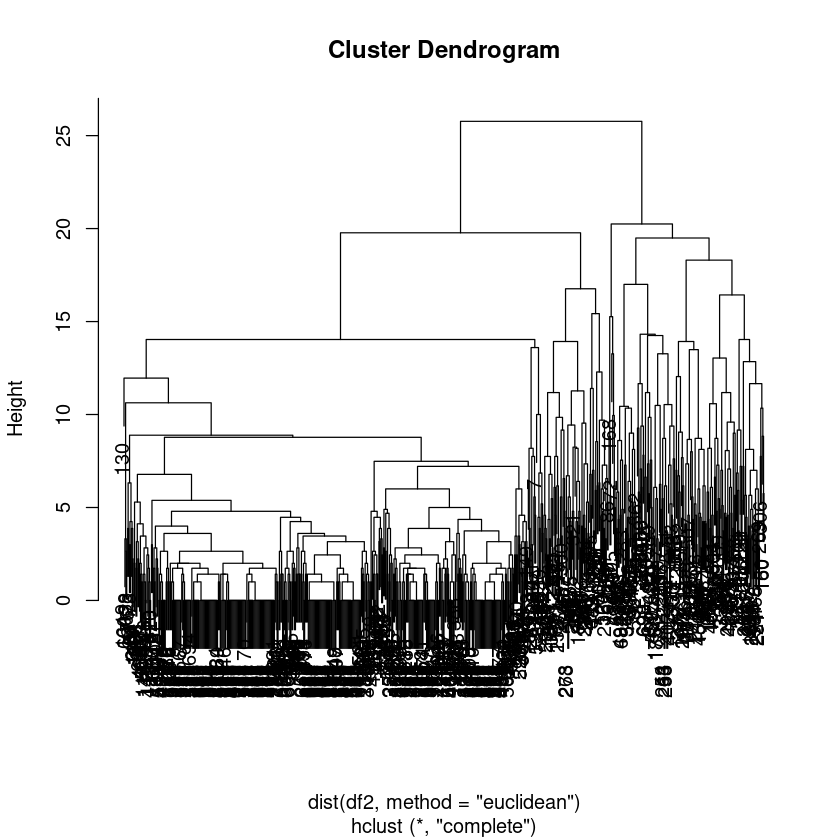

In [11]:
plot(hclust.out)

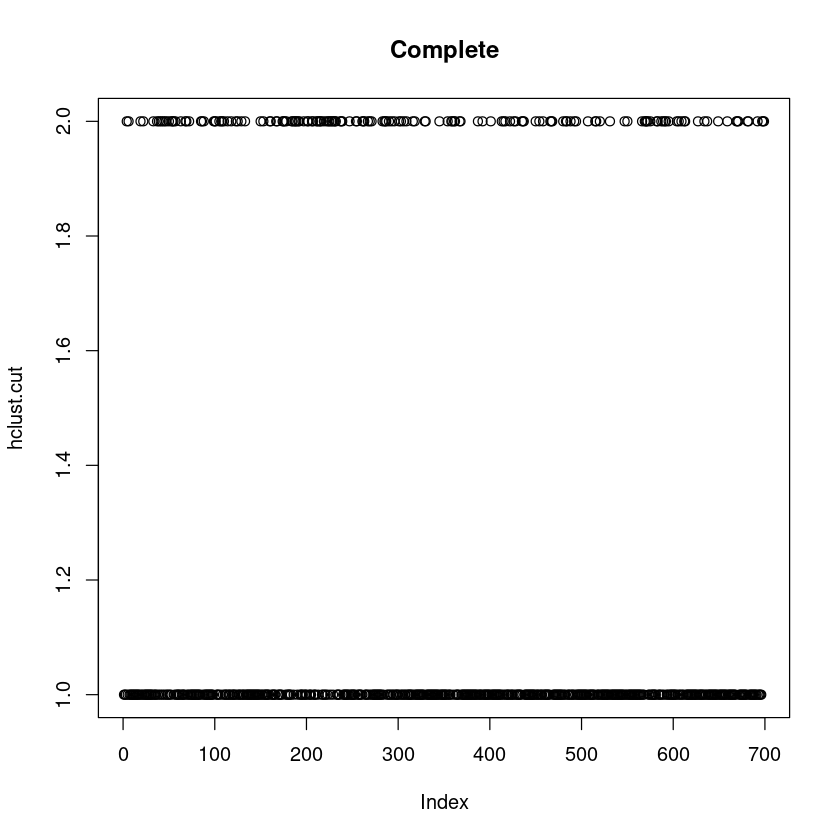

In [12]:
# Cut by number of clusters
hclust.cut <- cutree(hclust.out, k = 2)

# Plot dendrogram of hclust.complete
plot(hclust.cut, main = "Complete")